# Exploratory Data Analysis

Importing dataset

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
%matplotlib inline

## Plotting confirmed cases in France vs Italy, China and Singapore

In [4]:
ts_confirmed = pd.read_csv("DATA/time_series_covid_19_confirmed.csv")
ts_confirmed_new = pd.read_csv("Data/time_series_19-covid-Confirmed_new.csv")

In [5]:
ts_confirmed_new[ts_confirmed_new["Country/Region"] == "France"]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
159,France,France,46.2276,2.2137,0,0,2,3,3,3,4,5,5,5,6,6,6,6,6,6,6,11,11,11,11,11,11,11,12,12,12,12,12,12,12,12,12,12,14,18,38,57,100,130,191,204,285,377,653,949,1126,1209,1784,2281,2281,3661,NaN
200,St Martin,France,18.0708,-63.0501,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,NaN
207,Saint Barthelemy,France,17.9000,-62.8333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,3,3,3,1,1,1,1,1,NaN
408,French Polynesia,France,-17.6797,149.4068,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,NaN


import pandas_profiling
pandas_profiling.ProfileReport(ts_confirmed)

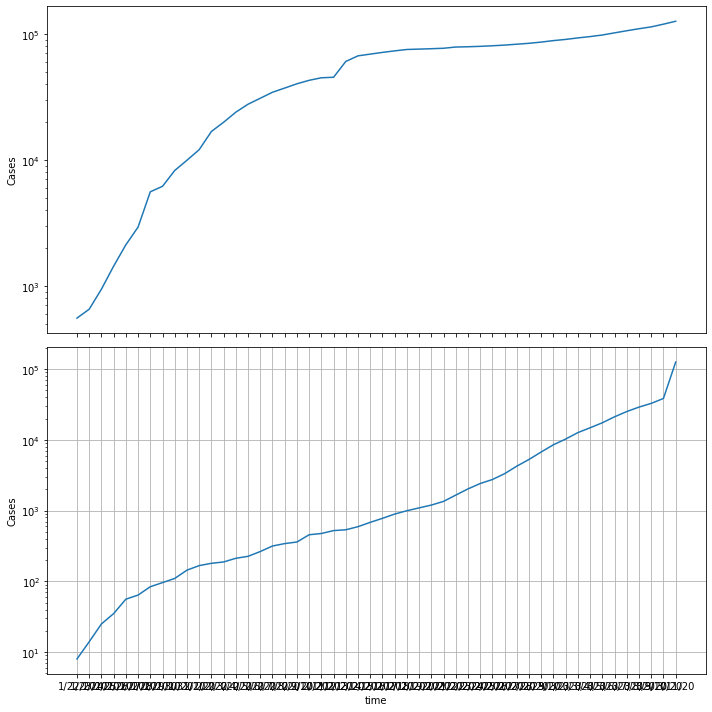

In [6]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(10, 10))
axs[0].plot(ts_confirmed.sum()[2:])
axs[0].set_ylabel("Cases")
axs[1].set_ylabel("Cases")
axs[1].set_xlabel("time")
axs[1].grid(True)
axs[1].set_yscale("log")
axs[0].set_yscale("log")

axs[1].plot(ts_confirmed[ts_confirmed["Country/Region"] != "Mainland China"].sum()[2:])
fig.tight_layout()

On remarque clairement que nous le reste du monde entre dans la phase exponentiel

## Construction des series temporels des cas confirmés 

In [9]:
f_confirmed = ts_confirmed[ts_confirmed["Country/Region"] == "France"].sum(axis=0)[2:]
i_confirmed = ts_confirmed[ts_confirmed["Country/Region"] == "Italy"].sum(axis=0)[4:]
c_confirmed = ts_confirmed[ts_confirmed["Country/Region"] == "Mainland China"].sum(
    axis=0
)[4:]
sg_confirmed = ts_confirmed[ts_confirmed["Country/Region"] == "Singapore"].sum(axis=0)[
    4:
]
ger_confirmed = ts_confirmed[ts_confirmed["Country/Region"] == "Germany"].sum(axis=0)[
    4:
]
sp_confirmed = ts_confirmed_new[ts_confirmed_new["Country/Region"] == "Spain"].sum(axis=0)[
    4:
]

f_confirmed.index = pd.to_datetime(f_confirmed.index)
i_confirmed.index = pd.to_datetime(i_confirmed.index)
c_confirmed.index = pd.to_datetime(c_confirmed.index)
sg_confirmed.index = pd.to_datetime(sg_confirmed.index)
sp_confirmed.index = pd.to_datetime(sp_confirmed.index)
ger_confirmed.index = pd.to_datetime(ger_confirmed.index)

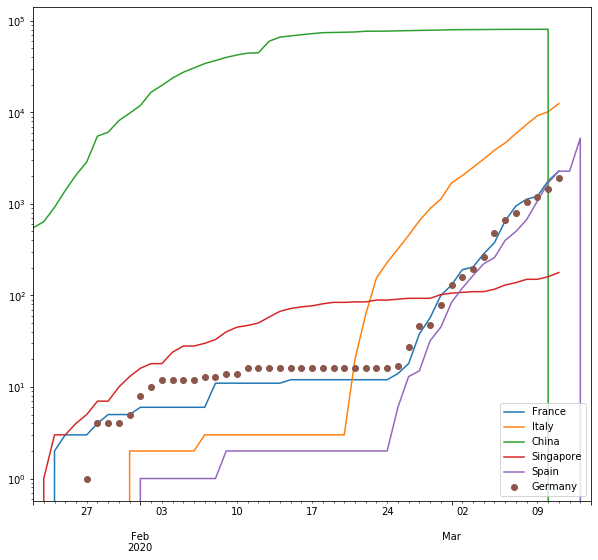

In [10]:
fig = plt.figure(figsize=(10, 20))
ax = fig.add_subplot(2, 1, 1)
ax.set_yscale("log")

f_confirmed.plot(label="France")
i_confirmed.plot(label="Italy")
c_confirmed.plot(label="China")
sg_confirmed.plot(label="Singapore")
sp_confirmed.plot(label="Spain")
ger_confirmed.plot(marker="o", label="Germany", linestyle="")

plt.legend(loc="lower right")

## Facteur de changement

Le facteur de changement de la courbe est égale au ratio de nouvzaux cas détéctés entredeux jours. Autrement dit, c'est le ratio de la différence de nombres de cas détectés entre deux jours successifs

In [12]:
def growth(serie):
    g = []
    index = []
    for i in range(len(f_confirmed) - 2):
        if serie.diff()[i] == 0:
            g.append(0)
        else:
            g.append(serie.diff()[i + 1] / serie.diff()[i])
        index.append(serie.index[i])
    return pd.Series(data=g, index=index).replace([np.inf, -np.inf], np.nan).fillna(0)

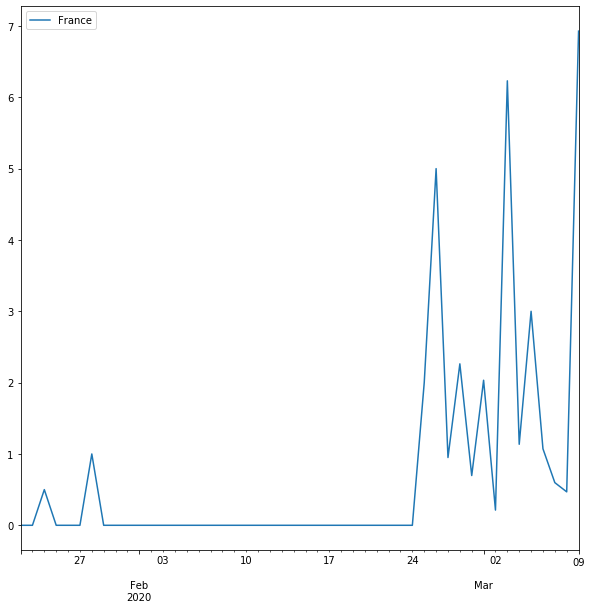

In [13]:
fig = plt.figure(figsize=(10, 10))

growth(f_confirmed).plot(label="France")
#growth(i_confirmed).pct_change().plot(label='Italy')
# growth(c_confirmed).pct_change().plot(label='China')
#growth(sg_confirmed).pct_change().plot(label="Singapore")

plt.legend(loc="upper left")

Décaler la courbe des cas de france et d'italie

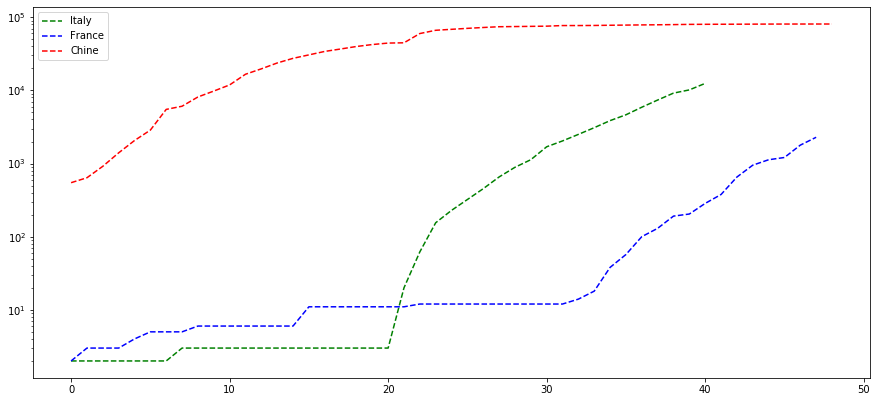

In [10]:
ilist = i_confirmed.where(i_confirmed > 0).dropna().tolist()
flist = f_confirmed.where(f_confirmed > 0).dropna().tolist()
Clist = c_confirmed.where(c_confirmed > 0).dropna().tolist()


fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(2, 1, 1)
ax.set_yscale("log")
ax.plot(ilist, "g--", label="Italy")
ax.plot(flist, "b--", label="France")
ax.plot(Clist, "r--", label="Chine")
plt.legend(loc="upper left")

## Remarques


En décalant les deux courbes pour avoir le même début, nous remarquons que les courbes ont la même forme exponentiel, la France a pu retarder l'évolution des cas de COVID19 un peu plus longtemps de l'Italie mais la progression du virus est visuellement la même;

**Comme annoncé par le président de la république Macron, l'épidémie en France ne fait que commencer.**

## Deaths

In [11]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [12]:
patient_info= pd.read_csv("Data/patient-list.csv")

In [13]:
patient_info.head()

,id,case_in_country,reporting date,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,international_traveler,domestic_traveler,exposure_start,exposure_end,traveler,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link
0,1,NaN,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,1/3/2020,0.0,1/11/2020,NaN,NaN,12/29/2019,1/4/2020,NaN,1.0,0.0,0,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...
1,1,NaN,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,0.0,1/15/2020,NaN,NaN,NaN,1/12/2020,NaN,0.0,1.0,0,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...
2,2,NaN,1/21/2020,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,1/4/2020,0.0,1/17/2020,NaN,NaN,NaN,1/3/2020,NaN,0.0,1.0,0,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...
3,3,NaN,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,NaN,1/19/2020,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?
4,4,NaN,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,NaN,1/14/2020,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?


In [14]:
patient_info.groupby("gender").count()
patient_info["recovered"].fillna("0", inplace=True)

In [15]:
import re


def is_date(value):
    """
    Returns a boolean indicating whether a given value is a date.
    """
    regex = re.compile(r"\d{1,2}/\d{1,2}/\d{4}")
    return bool(regex.match(value))

In [ ]:
patient_info["clean_recovered"] = patient_info["recovered"].apply(
    lambda x: "1" if is_date(x) else x
)
patient_info["clean_recovered"] = patient_info["clean_recovered"].astype("category")
patient_info["clean_death"] = patient_info["death"].apply(
    lambda x: "1" if is_date(x) else x
)
patient_info["clean_death"] = patient_info["clean_death"].astype("category")

In [ ]:
rec_age_fig = make_subplots(
    rows=1, cols=2, subplot_titles=("Age vs. Recovered", "Age vs. Death")
)

rec_age_fig.add_trace(
    go.Box(x=patient_info["clean_recovered"], y=patient_info["age"], name="Recovered"),
    row=1,
    col=1,
)
rec_age_fig.add_trace(
    go.Box(x=patient_info["clean_death"], y=patient_info["age"], name="Death"),
    row=1,
    col=2,
)
rec_age_fig.update_traces(boxpoints="all")
rec_age_fig.update_layout(
    title_text="Subplots of age in relation to recovery and death"
)
rec_age_fig.show()

# Linear Regression

## Constuction des datas

On construit la matrice X qui représente les **w intervals** depuis le début de notre série temporelle à la fin de la série temporelle.

Cette matrice historise les valeurs de la série tempoerelle et est utilisé pour prédire les prochaines valeurs de la série $ỹ$ :
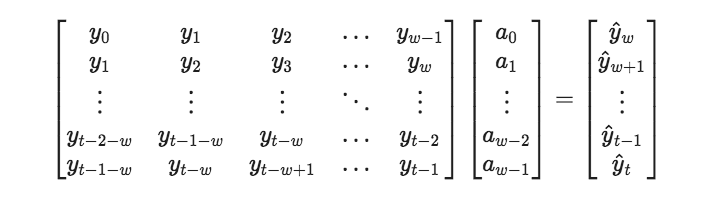


In [17]:
start = 10
middle = len(i_confirmed) - 10
end = len(i_confirmed) - 1

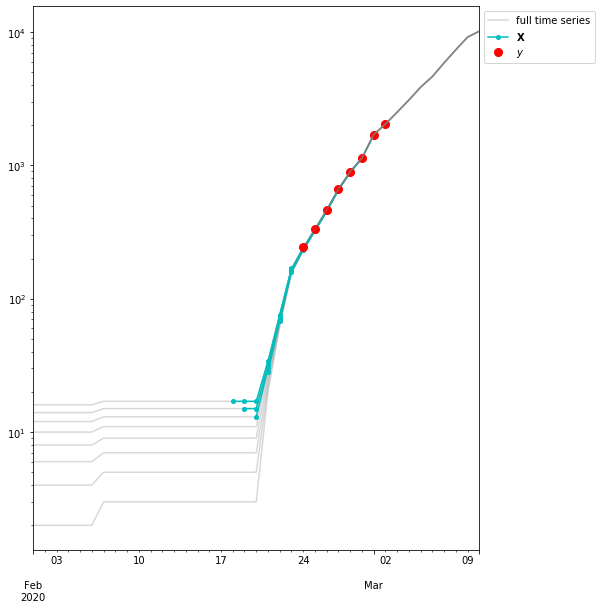

In [18]:
fig, ax = plt.subplots(figsize=(8, 10))

window = 6

for i in range(8):

    full = i_confirmed[start:end]
    train = i_confirmed[middle - i - window : middle - i]
    predict = i_confirmed[middle - i : middle - i + 1]

    (full + 2 * i).plot(ax=ax, c="grey", alpha=0.3)
    (train + 2 * i).plot(ax=ax, c="c", markersize=4, marker="o")
    (predict + 2 * i).plot(ax=ax, c="r", markersize=8, marker="o", linestyle="")


ax.get_yaxis().set_ticks([])
ax.set_yscale("log")

ax.legend(["full time series", "$\mathbf{X}$", "$y$"], bbox_to_anchor=(1, 1))

In [19]:
window = 5
num_samples = 10
X_mat = []
y_mat = []
for i in range(num_samples):
    # Slice a window of features
    X_mat.append(i_confirmed[middle - i - window : middle - i].values)
    y_mat.append(i_confirmed[middle - i : middle - i + 1].values)

X_mat = np.vstack(X_mat)
y_mat = np.concatenate(y_mat)

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression(fit_intercept=False)
lr = lr.fit(X_mat, y_mat)

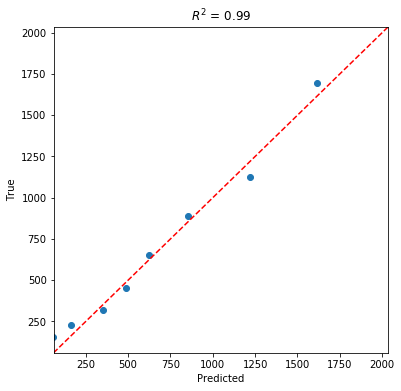

In [21]:
y_pred = lr.predict(X_mat)

fig, ax = plt.subplots(figsize=(6, 6))

ax.scatter(y_pred, y_mat)

one_to_one = np.arange(y_mat.min() - 2, y_mat.max() + 2)
ax.plot(one_to_one, one_to_one, c="r", linestyle="--")

ax.set_xlim((one_to_one[0], one_to_one[-1]))
ax.set_ylim((one_to_one[0], one_to_one[-1]))
ax.set_xlabel("Predicted")
ax.set_ylabel("True")
ax.set_title(f"$R^{2}$ = {r2_score(y_mat, y_pred):3.2f}");

# LSTM trained on french data

In [22]:
import math
from datetime import timedelta
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error

## Preparing the data

In [23]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence) - 1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.asarray(X), np.asarray(y)

In [24]:
# define input sequence
# choose a number of time steps ( equivalent to # of features)
n_steps = 10

X, y = split_sequence(f_confirmed, n_steps)

## LSTM Model

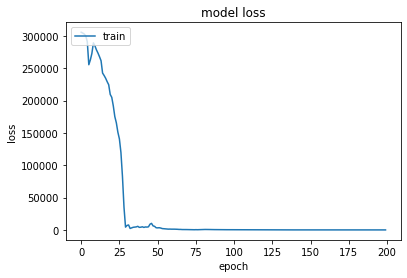

In [25]:
n_features = 1

X = X.reshape((X.shape[0], X.shape[1], n_features))

# define model
model = Sequential()
model.add(LSTM(50, activation="relu", input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer="adam", loss="mse")


# fit model
history = model.fit(X, y, epochs=200, verbose=0)

# history for loss
plt.plot(history.history["loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

## Prediction

Prédire l'évoltion des cas de COVID19 en France sur le prochains 30 jours

In [26]:
n = 20
index30 = pd.date_range(f_confirmed.index[-1] + timedelta(days=1), periods=n, freq="D")
last_values = f_confirmed[-n_steps:].values
prediction30 = []

In [27]:
for i in range(n):
    x_input = last_values[-n_steps:]
    x_input = x_input.reshape((1, n_steps, n_features))
    y_pred = model.predict(x_input)
    prediction30.append(int(y_pred[0][0]))
    last_values = np.append(last_values, int(y_pred[0][0]))

serie30 = pd.Series(data=prediction30, index=index30)

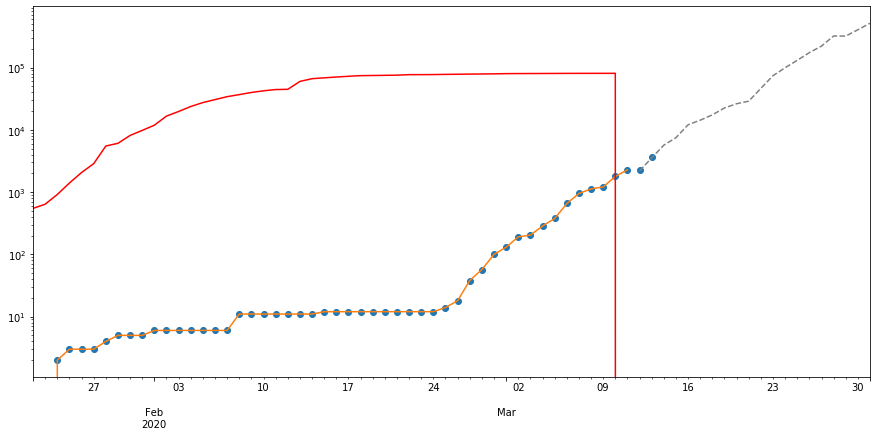

In [28]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(2, 1, 1)


ax.set_yscale('log')

f_confirmed_new = ts_confirmed_new[ts_confirmed_new["Country/Region"] == "France"].sum(axis=0)[4:-1]
f_confirmed_new.index = pd.to_datetime(f_confirmed_new.index)



f_confirmed_new.plot(ax=ax, label="france_new",marker='o',linestyle='')
f_confirmed.plot(ax=ax, label="france")
c_confirmed.plot(ax=ax, c="red", label="China")

serie30.plot(ax=ax, c="grey", linestyle="--", label="predition for 30 days")

In [31]:
serie30['2020-03']

2020-03-12      2191
2020-03-13      3542
2020-03-14      5669
2020-03-15      7484
2020-03-16     12053
2020-03-17     14284
2020-03-18     17393
2020-03-19     22448
2020-03-20     26236
2020-03-21     28831
2020-03-22     46328
2020-03-23     73963
2020-03-24     99281
2020-03-25    130731
2020-03-26    173701
2020-03-27    221200
2020-03-28    321511
2020-03-29    320018
2020-03-30    405281
2020-03-31    515243
Freq: D, dtype: int64

# LSTM used for china data

## Prepare train data

In [ ]:
# define input sequence
# choose a number of time steps ( equivalent to # of features)
n_steps = 3
X, y = split_sequence(c_confirmed[:-1], n_steps)

n_features = 1

# scaler = StandardScaler()
# trainX = scaler.fit_transform(X)
#
# trainX = trainX.reshape((trainX.shape[0], trainX.shape[1], n_features))

X = X.reshape((X.shape[0], X.shape[1], n_features))

## Define model

In [ ]:
# define model
model = Sequential()
model.add(LSTM(50, activation="relu", input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer="adam", loss="mse")


# fit model
history = model.fit(X, y, epochs=300, verbose=0)

# history for loss
plt.plot(history.history["loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

## Prediction

In [ ]:
n = 60
index30 = pd.date_range(f_confirmed.index[-1] + timedelta(days=1), periods=n, freq="D")
last_values = f_confirmed[-n_steps:].values
prediction30 = []


for i in range(n):
    x_input = last_values[-n_steps:]
    # Scale input
    x_input = x_input.reshape((1, n_steps))
    # x_input = scaler.transform(x_input)
    x_input = x_input.reshape((1, n_steps, n_features))
    # invert predictions
    # trainPredict = scaler.inverse_transform(trainPredict)
    # trainY = scaler.inverse_transform([trainY])
    y_pred = model.predict(x_input)
    prediction30.append(int(y_pred[0][0]))
    last_values = np.append(last_values, int(y_pred[0][0]))

serie30 = pd.Series(data=prediction30, index=index30)


fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(2, 1, 1)

ax.set_yscale("log")

f_confirmed.plot(ax=ax, label="france")
c_confirmed.plot(ax=ax, c="red", label="China")

serie30.plot(ax=ax, c="grey", linestyle="--", label="predition for 30 days")

**Note : To do demain**

kan nferge3 had lblane b exp

* Deaths analyses
* Reessayer LSTM for china data

Li na9ess :

* chi EDA tkoun mezyana : death analysis, 
* Ajouter des datas pour prédiction de l'épidémie
* nkteb 3la l'exponentiel kifach kat tkhdem  et la fonction logistique
* nchouf chnou darou nass 3la l'Italie 